# Data procesing and visualization for numeric values of a bubble column through CFD with OpenFOAM

We'll be treating some data from simulations of the biphasic flow of bubble column through CFD with OpenFOAM.

The data consists of the velocity values along a line in the $y$ axis whe the top of the bubble reachs a certain heght $z$. Four mesh types were tested (S -> Simple mesh, O -> Octagonal core mesh, C -> Square core mesh), and for each case 5 levels of mesh refinement, except the case of the S mesh where the fifth level of refinement was predicted to be to extreamly computationally expensive, and the results given not particulary good.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
SOC_u = pd.read_csv('data_SOC_u.csv')

For asthetics in the graphs, we'll set the y value in $cm$

In [4]:
SOC_u=SOC_u.set_index(SOC_u.index*100)

In [5]:
SOC_u.head()

,O1,O2,O3,O4,C1,C2,C3,C4,S1,S2,S3,S4,O5,C5
-1.000,0.058941,0.053680,0.050030,0.044546,0.060999,0.048897,0.048144,0.041385,0.011210,0.009524,0.008657,0.006463,0.044945,0.044622
-0.998,0.059001,0.053741,0.050130,0.044627,0.060999,0.049006,0.048321,0.041530,0.012729,0.011794,0.011912,0.009617,0.045056,0.044622
-0.996,0.059060,0.053803,0.050231,0.044708,0.060999,0.049114,0.048499,0.041676,0.014248,0.014161,0.015133,0.012776,0.045167,0.044797
-0.994,0.059120,0.053865,0.050331,0.044788,0.061068,0.049223,0.048676,0.041821,0.015768,0.016528,0.018355,0.015765,0.045278,0.044973
-0.992,0.059180,0.053926,0.050431,0.044869,0.061137,0.049332,0.048853,0.041967,0.017287,0.018894,0.020937,0.018392,0.045389,0.045148


## Velocity profile by mesh type and refinement 

We'll plot all the velocity profiles by their mesh type and level of refinement. To take advantage of the seaborn relplot() we have to move the dataframe from wide data to long data. The columns will be: the index for the $y$ value, a $u$ value for all other numeric values, the typo of mesh (S,O,C) and the refinement level. This last two come in the column name.

In [6]:
SOC_u_f = pd.DataFrame()

In [7]:
cols = SOC_u.columns

In [8]:
for col in cols:
    for i in range(len(SOC_u)):
        SOC_u_f = SOC_u_f.append({'y': SOC_u.index[i], 'u': SOC_u[col].iloc[i], 'mesh': col[0], 'ref': int(col[1])}, ignore_index=True)

In [9]:
SOC_u_f.head()

,mesh,ref,u,y
0,O,1.0,0.058941,-1.000
1,O,1.0,0.059001,-0.998
2,O,1.0,0.059060,-0.996
3,O,1.0,0.059120,-0.994
4,O,1.0,0.059180,-0.992


TypeError: 'Legend' object is not callable

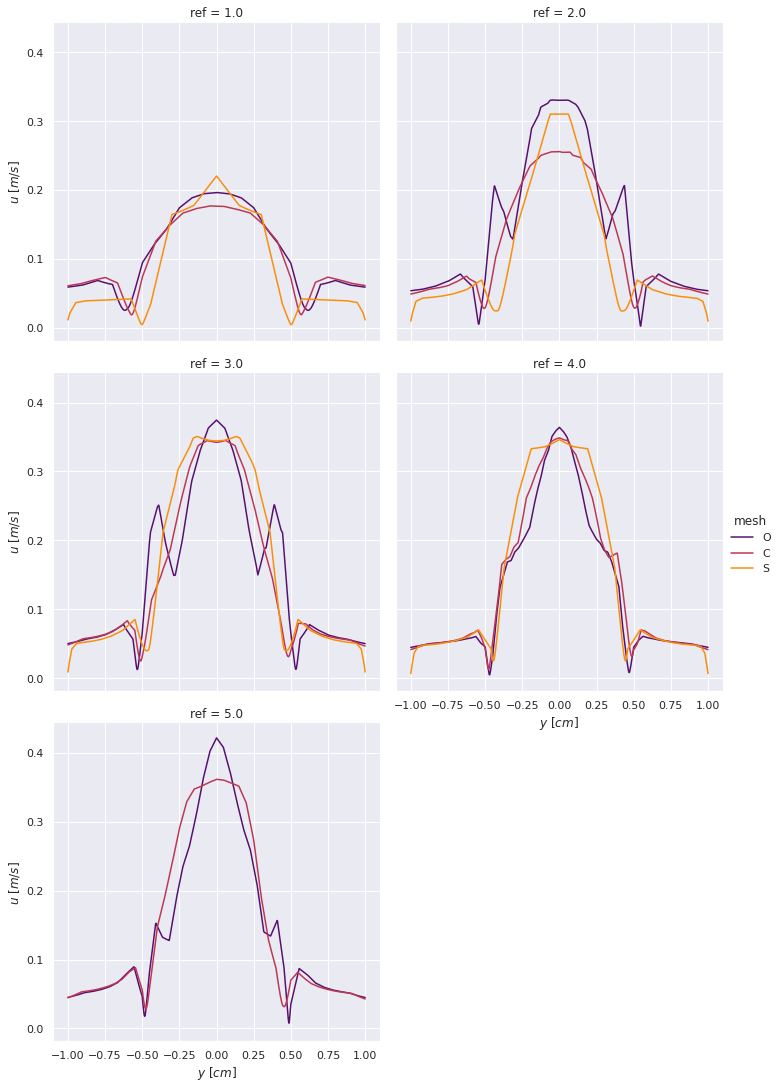

In [41]:
profile_plot = sns.relplot(data=SOC_u_f, x='y', y='u', hue='mesh', col='ref', kind='line', col_wrap=2, palette='inferno')
profile_plot.set_xlabels('$y\,\, [cm]$')
profile_plot.set_ylabels('$u\,\, [m/s]$')
profile_plot.legend()
plt.tight_layout()

## RMS by mesh type and refinement 

This is pretty easy if we add a column that is just the squares of all the velocity values and group them by mesh and ref.

In [11]:
SOC_u_f['u2'] = SOC_u_f['u']**2

In [12]:
SOC_u_RMS = np.sqrt(SOC_u_f.groupby(['mesh','ref']).sum()['u2'].unstack()/len(SOC_u))

A heat map can help us visualize the whole thing

<AxesSubplot:xlabel='ref', ylabel='mesh'>

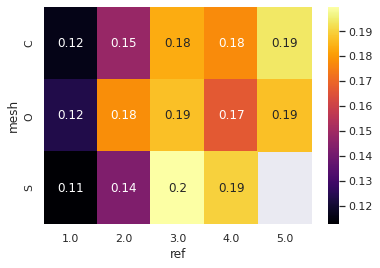

In [21]:
sns.heatmap (SOC_u_RMS, cmap='inferno', annot=True)

## Mesh convergence

By comparing $u$ values between refinements we can get an idea of the convergence of the mesh, as well as the unstable points in it.

In [14]:
SOC_conv = pd.DataFrame()
SOC_conv_wide = pd.DataFrame()

In [15]:
SOC_conv['O43'] = SOC_u['O4']/SOC_u['O3']
SOC_conv['C43'] = SOC_u['C4']/SOC_u['C3']
SOC_conv['S43'] = SOC_u['S4']/SOC_u['S3']
SOC_conv['O54'] = SOC_u['O5']/SOC_u['O4']
SOC_conv['C54'] = SOC_u['C5']/SOC_u['C4']

In [16]:
SOC_conv.head()

,O43,C43,S43,O54,C54
-1.000,0.890386,0.859600,0.746515,1.008966,1.078220
-0.998,0.890218,0.859457,0.807334,1.009624,1.074442
-0.996,0.890049,0.859316,0.844187,1.010282,1.074900
-0.994,0.889879,0.859175,0.858886,1.010938,1.075357
-0.992,0.889711,0.859033,0.878480,1.011589,1.075810


Again, we turn the dataframe from wide data to long data to use more efectively seaborn

In [18]:
for col in SOC_conv.columns:
    for i in range(len(SOC_u)):
        SOC_conv_wide = SOC_conv_wide.append({'y': SOC_conv.index[i], 'u': SOC_conv[col].iloc[i], 'mesh': col[0], 'n': int(col[1]), 'n-1':int(col[2])}, ignore_index=True)

No handles with labels found to put in legend.


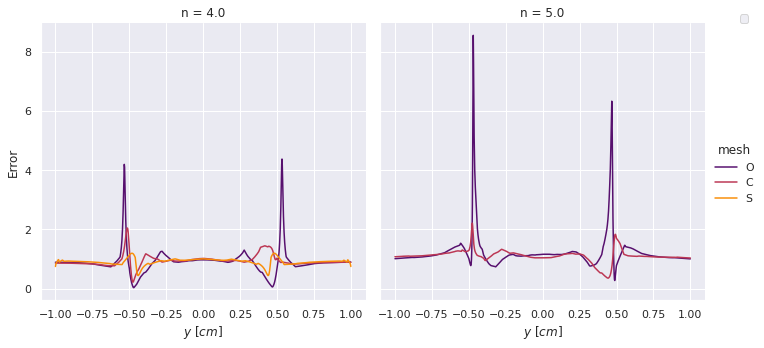

In [33]:
convergence_plot = sns.relplot(data=SOC_conv_wide, x='y', y='u', hue='mesh', col='n', kind='line', palette='inferno')
convergence_plot.set_xlabels('$y\,\, [cm]$')
convergence_plot.set_ylabels('Error')
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.tight_layout()